In [36]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [37]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [38]:
NUM_CLASSES = 8

# Dataset reading

In [39]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [40]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),  # Input layer
    tf.keras.layers.Dense(128, activation='relu'),  # Increased number of neurons
    tf.keras.layers.BatchNormalization(),  # Batch normalization
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    tf.keras.layers.BatchNormalization(),  # Batch normalization
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(32, activation='relu'),  # Third hidden layer
    tf.keras.layers.BatchNormalization(),  # Batch normalization
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')  # Output layer
])

In [43]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,000 (66.41 KB)

 Trainable params: 16,552 (64.66 KB)

 Non-trainable params: 448 (1.75 KB)

In [44]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [45]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [46]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1406 - loss: 3.0491
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.1494 - loss: 2.8222 - val_accuracy: 0.2468 - val_loss: 2.0611
Epoch 2/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2656 - loss: 2.2554
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3124 - loss: 2.0630 - val_accuracy: 0.4557 - val_loss: 1.9997
Epoch 3/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4219 - loss: 1.7233
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4487 - loss: 1.6103 - val_accuracy: 0.4810 - val_loss: 1.9443
Epoch 4/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5859 - loss: 1.3275
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━

In [47]:
# Model evaluation
val_loss, val_acc =  model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 2.2011e-05


In [48]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [49]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[9.1769452e-06 4.3758359e-06 2.8388893e-06 2.7208522e-09 9.9998069e-01
 9.5332672e-07 1.4488569e-06 4.5208606e-07]
4


# Confusion matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


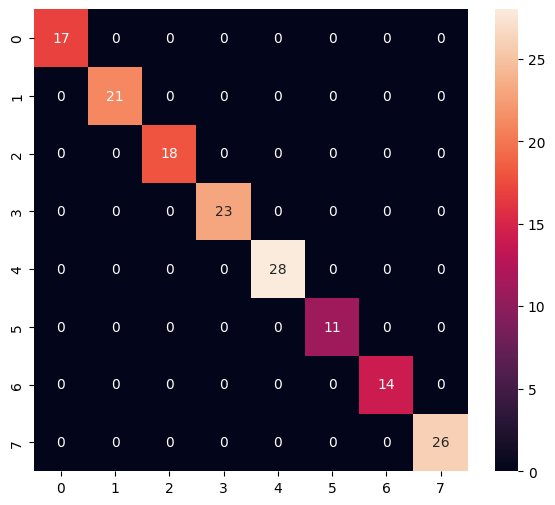

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        26

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [51]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [52]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\LAKSHY~1\AppData\Local\Temp\tmpmhuqdbrr\assets


INFO:tensorflow:Assets written to: C:\Users\LAKSHY~1\AppData\Local\Temp\tmpmhuqdbrr\assets


Saved artifact at 'C:\Users\LAKSHY~1\AppData\Local\Temp\tmpmhuqdbrr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  3094830446576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3094828137136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3094709328656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3094709324960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3094829301824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3094829307456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3094709330944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3094830584528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3094830595792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3094830582592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3094830586

23168

# Inference test

In [53]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [54]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [55]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [56]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [57]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.3339968e-06 4.3140149e-06 2.7141959e-06 2.6573477e-09 9.9998093e-01
 9.6296230e-07 1.3963254e-06 4.4333225e-07]
4
